In [5]:
import pandas as pd
import seaborn as sns
from string import punctuation

In [6]:
# 1. Parisiusti juridiniu asmenu registre iregistruotus asmenis https://www.registrucentras.lt/aduomenys/?byla=JAR_IREGISTRUOTI.csv

df = pd.read_csv('https://www.registrucentras.lt/aduomenys/?byla=JAR_IREGISTRUOTI.csv')
df

,JA_kodas,JA_pavadinimas,adresas,reg_data,form_kodas,form_pavadinimas,status_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data
0,305235418,"""10 liepų"" UAB",Klaipėdos m. sav. Klaipėdos m. Liepų g. 4,2019-08-22,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2019-08-22,2022-12-01
1,304682359,"""1024 MB"" MB",Vilniaus m. sav. Vilniaus m. I. Simonaitytės g...,2017-10-03,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2017-10-03,2022-12-01
2,304934714,"""115 idėjų"" MB",Kauno m. sav. Kauno m. Kalniečių g. 196-24,2018-10-17,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2018-10-17,2022-12-01
3,305863120,"""14 Trimitų"" UAB",Kaunas Kukučių g. 39,2021-08-11,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2021-08-11,2022-12-01
4,305802345,"""2 dimensijos"" MB",Vilnius V. Nagevičiaus g. 3,2021-06-18,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2021-06-18,2022-12-01
...,...,...,...,...,...,...,...,...,...,...
251659,300561075,"Žygeivių klubas ""ŽK Ąžuolas""",Kauno m. sav. Kauno m. Smalininkų g. 7-4,2006-04-19,630,Asociacija,0,Teisinis stat neįregistruotas,2006-04-19,2022-12-01
251660,302651144,ŽYGIMANTO GATVĖS GYVENAMŲJŲ NAMŲ SAVININKŲ BEN...,Šiaulių r. sav. Dainų k. Žalioji g. 3,2011-07-28,270,Bendrija,0,Teisinis stat neįregistruotas,2011-07-28,2022-12-01
251661,304368892,Žygimantų 12 UAB,Vilnius Konstitucijos pr. 21B,2016-08-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2016-08-25,2022-12-01
251662,302328408,Žygio g. 14A daugiabučio namo savininkų bendrija,Vilniaus m. sav. Vilniaus m. Žygio g. 14A-5,2009-04-09,270,Bendrija,0,Teisinis stat neįregistruotas,2009-04-09,2022-12-01


<AxesSubplot:xlabel='reg_data'>

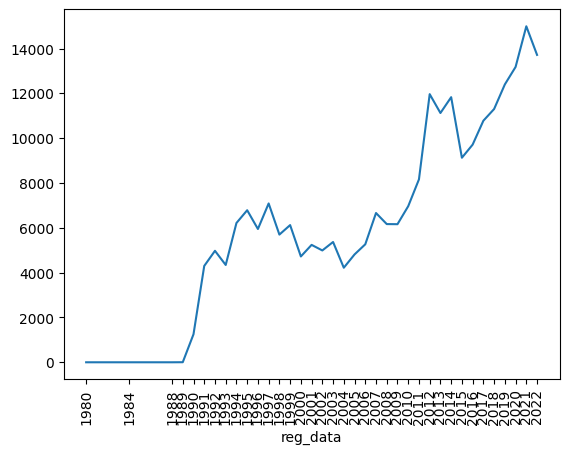

In [7]:
# 2. Kiek imoniu buvo iregistruota kiekvienais metais? Pavaizduoti grafiskai.

df['reg_data'] = pd.to_datetime(df['reg_data'])
df_grouped = df['JA_kodas'].groupby(df['reg_data'].dt.year).count()
df_grouped.plot(xticks=df_grouped.index, rot=90)

<AxesSubplot:xlabel='season', ylabel='JA_kodas'>

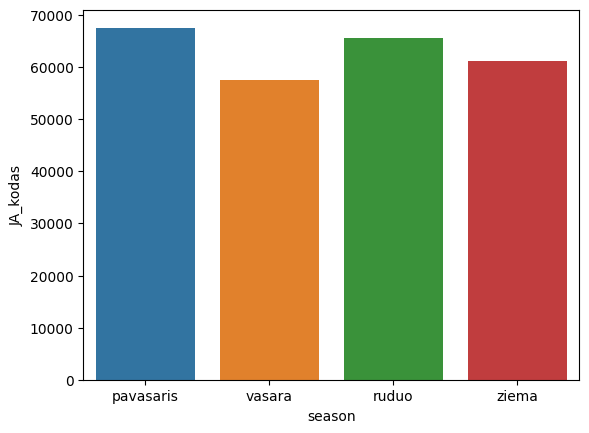

In [15]:
# 3. Kuri metu laikotarpi (pavasaris, vasara, ruduo, ziema) registruojama daugiausiai imoniu? Atvaizduoti grafiskai. Svarbu atvaizduojant islaikyti X asies pavadinimu eiliskuma, kuris turi buti toks: pavasaris, vasara, ruduo ziema.

df['season'] = df['reg_data'].apply(lambda x: 'ziema' if x.month in (12, 1, 2) else 'pavasaris' if x.month in (3, 4, 5) else 'vasara' if x.month in (6, 7, 8) else 'ruduo')
df_season_grouped = df['JA_kodas'].groupby(df['season']).count()
sns.barplot(x='season', y='JA_kodas', data=df_season_grouped.reset_index(), order=['pavasaris', 'vasara', 'ruduo', 'ziema'])

In [9]:
# 4. Suraskite imones kuriu pavadinime yra minimas zodis "auto" ir kuriu pavadinimas yra trumpesnis negu 20 simboliu. Atvaizduokite imoniu pavadinimus. Atvaizduojamuose pavadinimuose neturetu butu specialiu simboliu kaip ,.;!, etc. ir skaiciu.  

auto_mask = df['JA_pavadinimas'].str.contains('auto')
length_mask = df['JA_pavadinimas'].str.len() <= 20
df[auto_mask & length_mask]['JA_pavadinimas'].apply(lambda x: ''.join([i for i in x if not i.isdigit() and i not in list(punctuation)]))

25             A autodalys UAB
33           ABC autodalys UAB
1408             Interautos MB
1455               Janauto UAB
1880         Masauto nuoma UAB
                  ...         
247554         VšĮ VDautosport
248021      VšĮ Atostogautojas
248682    VšĮ Kauno autoklubas
249354             VšĮ Ranauto
249797           VšĮ Tautos TV
Name: JA_pavadinimas, Length: 424, dtype: object